# Data Mining Assignment 2 Bonus


Vyron-Georgios Anemogiannis 1115202000008 \
Georgios-Alexandros Vasilakopoulos 1115202000018


Written in google colab

In [75]:
path = "/content/drive/MyDrive/ML/DataMining/"

## Imports & Drive Mount

In [76]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np
import time
import urllib.request

In [77]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Download Book Covers
Image number to download is set to 500 \
If the images already exist, they are not downloaded again.

In [78]:
MAX_IMAGES = 500

In [79]:
def get_books_cover(DIR_PATH, books, bookIds):
        """
        Retrieves books covers to a img/ directory
        Will work on existing books class attribute, so a GoodReads list should be scraped or a books list loaded
        (csv_to_books) before use.
        :return: None
        """
        img_dir = "img"
        check_folder = os.path.isdir(DIR_PATH + img_dir)

        # If folder doesn't exist, then create it.
        if not check_folder:
            os.makedirs(DIR_PATH + img_dir)
            print("Creating folder: ", img_dir)

        else:
            print(img_dir, "folder already exists, saving images to folder.")

        # Download covers
        counter = 0        
        for (book, bookId) in zip(books, bookIds):   
                if type(book) != str:
                    continue
                counter += 1
                if not os.path.exists(DIR_PATH + "img/" + bookId  + ".jpg"):
                    urllib.request.urlretrieve(
                        book, DIR_PATH + "img/" + bookId  + ".jpg"
                    )
                    # Set a respectful wait time
                    time.sleep(0.5)
                if counter >= MAX_IMAGES:
                    break

In [80]:
file = path + "books_1.Best_Books_Ever.csv"

In [81]:
finalbooks = pd.read_csv(file)

In [82]:
finalbooks.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [83]:
images = finalbooks['coverImg']
Ids = finalbooks['bookId']

In [84]:
get_books_cover(path,images,Ids)

img folder already exists, saving images to folder.


## Fetch Images from directory

In [85]:
def getImagesAndNames(image_directory):
    directory_listing = os.listdir(image_directory)

    image_list = []
    for image in directory_listing:
        image_array = cv2.imread(image_directory + image)
        image_list.append(image_array)
    return image_list, directory_listing

## Split the data and names into train and test sets (5%)

In [86]:
image_data, image_names = getImagesAndNames(path + 'img/')
main_data, test_data, main_names, test_names = train_test_split(image_data, image_names, test_size = 0.05)

In [87]:
def getVectorList(image_data, concat = True): # If concat is false, then the mean vector is taken
    hist_list_B = []
    for image in image_data:
        hist_list_B.append(cv2.calcHist([image],[0],None,[32],[0,256]))

    hist_list_G = []
    for image in image_data:
        hist_list_G.append(cv2.calcHist([image],[1],None,[32],[0,256]))

    hist_list_R = []
    for image in image_data:
        hist_list_R.append(cv2.calcHist([image],[2],None,[32],[0,256]))


    vector_list = []
    for i in range(len(image_data)):
        if concat:  # The resulting vectors will be concatenations of each color
            final_vector = np.concatenate((hist_list_B[i],hist_list_G[i],hist_list_R[i]))
        else:       # The resulting vectors will be the mean vectors for each color
            final_vector = hist_list_B[i] + hist_list_G[i] + hist_list_R[i]
            final_vector/=3

        vector_list.append(final_vector.transpose()[0])
    
    return vector_list

## View Covers similar to the first instance of the test set

In [88]:
def view_similar(transformed_data, instance, instance_name, N = 5, concat = True):

    print("Viewing similar covers to " + instance_name)
    plt.imshow(cv2.cvtColor(instance, cv2.COLOR_BGR2RGB))
    plt.axis("off")  # Disable axes
    plt.show()


    instance = getVectorList([instance],concat)[0]     #Transform instance image to vector
    similarity_list = np.array([cosine_similarity([instance],[i])[0] for i in transformed_data]).transpose()[0] #Evaluate similarities for each image.
     
    similarity_list = similarity_list.argsort() #Sort the list


    #Print the most similar book covers
    for i in range(N):
        print(i)
        plt.imshow(cv2.cvtColor(main_data[similarity_list[-1-i]], cv2.COLOR_BGR2RGB))
        plt.axis("off")  
        plt.show()

## Similar Covers (Concatenation)

In this case, the produced covers are similar in color. This is due to the fact that each color is treated seperately in the evaluation of similarity.

In [89]:
transformed_data = getVectorList(main_data)

Viewing similar covers to 4687.The_Cider_House_Rules.jpg


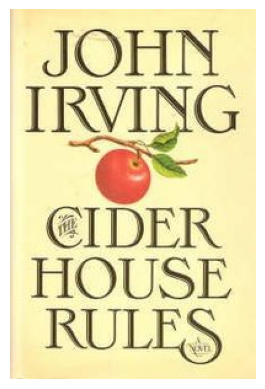

0


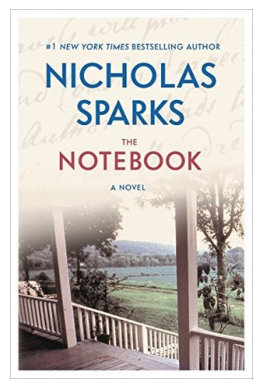

1


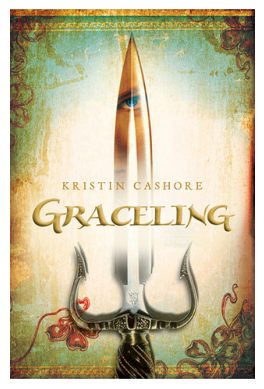

2


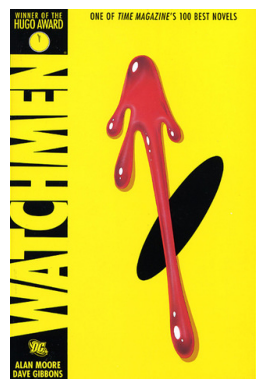

3


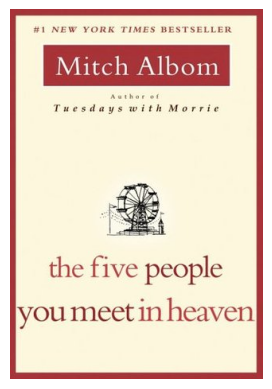

4


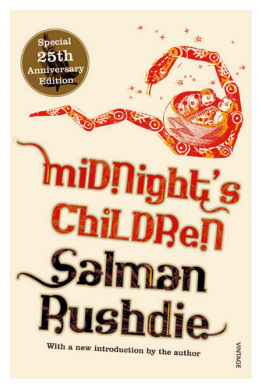

In [90]:
view_similar(transformed_data,test_data[0],test_names[0])

## Similar Covers (Mean Vector)

In [91]:
transformed_data = getVectorList(main_data,concat = False)

Viewing similar covers to 4687.The_Cider_House_Rules.jpg


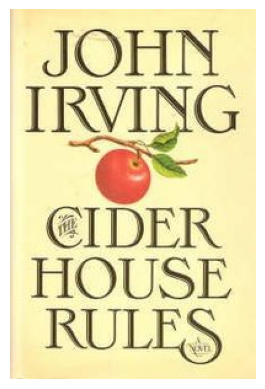

0


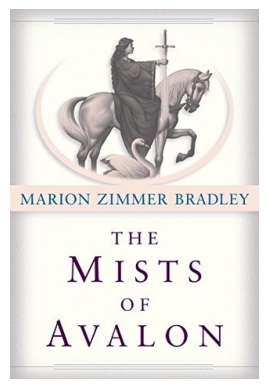

1


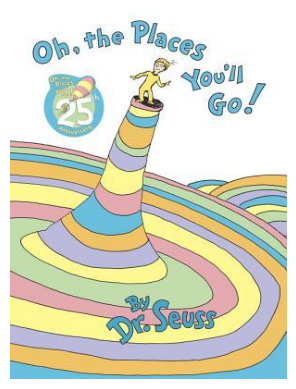

2


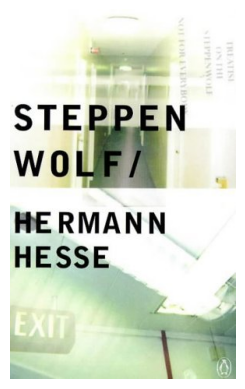

3


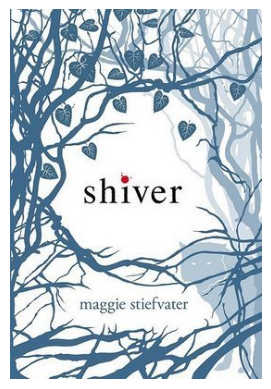

4


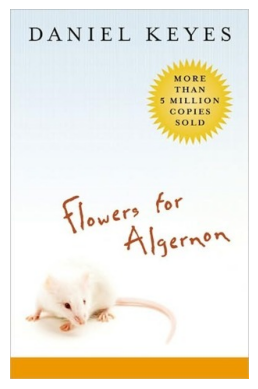

In [92]:
view_similar(transformed_data,test_data[0],test_names[0], concat = False)